In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="darkgrid")
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler
import pandas.util.testing as tm

C:\Users\sibin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Introduction:
The dataset to be wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
## Gathering data
### 1. Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets.
### 2. Image Predictions File
The file image_predictions.tsv is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.
### 3. Additional Data via the Twitter API
Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [2]:
# Loading dataset

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)


In [3]:
with open('image_predictions.tsv', mode = 'wb') as file:
          file.write(response.content)

In [4]:
df_image = pd.read_csv(r"C:\Users\sibin\Desktop\udacity\We_rate_dogs_tweepy\data\image_predictions.tsv", sep = '\t')

In [5]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#load twitter archieve data
df_twitter = pd.read_csv(r"C:\Users\sibin\Desktop\udacity\We_rate_dogs_tweepy\data\twitter-archive-enhanced.csv")
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
# importing twitter api
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


consumer_key ='xxxx'
consumer_secret ='xxxx'
access_token ='xxxx'
access_secret = 'xxxx'

In [28]:

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [46]:
tweet_ids = df_twitter.tweet_id.values
with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing


In [152]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [153]:
# Create tweet_info DataFrame
df_info_json = pd.DataFrame()

In [154]:
 #Add variables to tweet_info_json DataFrame
df_info_json['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
df_info_json['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
df_info_json['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
df_info_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


### Assessing data

Here the data that was gathered is assessed both visually and programmatically for quality and tidiness issues.  
Analysis requires only the tweets with original ratings with images, no retweets and reply tweets to be retained.  
Quality: issues with content. Low quality data is also known as dirty data.
Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. 

#### 1. Twitter Archieve data

In [13]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

    There are 2356 entries.
    retweeted_status_id shows the tweets that are retweeted.
    The dog stages are given as four columns
    There are 78 reply tweets
    181 are retweets(retweeted_status_id)
    2297 rows have expanded url, which are the links to tweets, 59 image url missing

In [14]:
df_twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
df_twitter['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

    There are 4 sources from where data is extracted, we dont need the full url. 

In [16]:
# timestamp is an object
type(df_twitter['timestamp'][0])

str

    Time stamp is in string format

In [17]:
# number of missing values
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
# said that denominator needs to be 10
df_twitter[df_twitter['rating_denominator'] != 10]['rating_denominator'].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

    There are 23 denominators with value not equal to 10 

In [18]:
# numerators are said to have a series of values
df_twitter['rating_numerator'].value_counts().sort_values(ascending = False)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
121       1
80        1
204       1
24        1
143       1
99        1
45        1
27        1
17        1
1776      1
960       1
666       1
182       1
26        1
144       1
88        1
84        1
165       1
60        1
50        1
44        1
20        1
Name: rating_numerator, dtype: int64

In [19]:
len(df_twitter[df_twitter['rating_numerator'] > 20]['rating_numerator'])

24

In [20]:
# View rows where the value of 'name' is lowercase - indicates that it is not an actual name
x = df_twitter.loc[df_twitter['name'].str.islower()]
x.name

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

    There are 109 names of lowercase that are not actually names

In [21]:
# check for duplicated values
df_twitter.duplicated().sum()

0

    There are zero duplicated rows

#### 2. Twitter image data

In [22]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


    data seems to have no missing values. 

#### 3. Tweet json file

In [179]:
df_info_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


    There are 2331 tweets with zero null values,
    It would be good if we could merge this data to twitter archieve data

In [180]:
# missing values
df_info_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

    There are zero missing values

In [181]:
df_info_json[df_info_json.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


    There are zero duplicated values

### Assessment Summary

#### Quality
######  `df_twitter` table

- 181 Retweeted data
- 78 reply tweets
- Source column with HTML tags
- Expanded URLS have 59 missing values
- Timestamp in string format
- Numerator and dinominator rating in integer format
- Numerators with decimal values, need to see how many of them are retweets.
- Dinominator rating other than value 10

###### `df_image` table

- Only 2075 tweets have image
- Entries where "p1_dog" has a False value
- The "p1" and "p1_conf" column names are not explanatory

#### Tidiness
- In df_twitter table dog's stage dogoo, floofer, pupper, puppo is spread in different columns
- df_image , df_info_json needs to be joined with archive table df_twitter
- columns associated with retweets and reply tweets
- p2,p3 related columns is not of use, as we take most confident predication




## Cleaning Data

At first, we create a copy of the three dataframes.
For cleaning the data we have followed the following process:


`Define`: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or yourself in the future) can look at your work and reproduce it.   
`Code`: convert those definitions to code and run that code.   
`Test`: test your dataset, visually or with code, to make sure your cleaning operations worked.


In [182]:
# create copies of the dataframes for cleaning
df_twitter_clean = df_twitter.copy()
df_image_clean = df_image.copy()
df_info_json_clean = df_info_json.copy()

##### 1. 181 retweeted data
##### Define:
   There are 181 retweets, we need only the original data. So Drop all rows containing non null values for retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

##### Code

In [183]:
df_twitter_clean = df_twitter_clean[df_twitter_clean['retweeted_status_id'].isna()]

##### Test

In [184]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

##### 78 reply tweets
##### Define
2 . inreply_status_id shows the reply tweets, they are to be removed

##### Code

In [185]:
df_twitter_clean = df_twitter_clean[df_twitter_clean['in_reply_to_status_id'].isna()]

##### Test

In [186]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

##### 3 . Multiple dog stages need to combined to one

##### Define:
There are columns with multiple dog stages, create one column with the dog stage

##### Code:

In [187]:
df_twitter_clean['floofer'].replace(np.nan , "", inplace = True)
df_twitter_clean['pupper'].replace( np.nan, "", inplace = True)
df_twitter_clean['puppo'].replace(np.nan , "", inplace = True)
df_twitter_clean['doggo'].replace(np.nan , "", inplace = True)
df_twitter_clean['floofer'].replace("None" , "", inplace = True)
df_twitter_clean['pupper'].replace("None" , "", inplace = True)
df_twitter_clean['puppo'].replace("None" , "", inplace = True)
df_twitter_clean['doggo'].replace("None" , "", inplace = True)

In [188]:
df_twitter_clean['stage'] = df_twitter_clean.doggo + df_twitter_clean.floofer + df_twitter_clean.pupper + df_twitter_clean.puppo
df_twitter_clean.loc[df_twitter_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_twitter_clean.loc[df_twitter_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_twitter_clean.loc[df_twitter_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

##### Test: 

In [189]:
df_twitter_clean.stage.value_counts()

                  1761
pupper            221 
doggo             72  
puppo             23  
floofer           9   
doggo, pupper     9   
doggo, puppo      1   
doggo, floofer    1   
Name: stage, dtype: int64

    Here space is treated as a value, it should be null value

In [190]:
df_twitter_clean.replace("",np.nan,inplace = True)

In [191]:
#checking again
df_twitter_clean.stage.value_counts()

pupper            221
doggo             72 
puppo             23 
floofer           9  
doggo, pupper     9  
doggo, puppo      1  
doggo, floofer    1  
Name: stage, dtype: int64

#### Tidiness
1 . In df_tweets table dog's stage dogoo, floofer, pupper, puppo is spread in different columns

##### Define: 
As we have combined the stage values to a single column, we need to drop the individual stage columns


##### Code

In [192]:
col = ['doggo','puppo','floofer','pupper']
df_twitter_clean.drop(col, axis = 1, inplace = True)

##### Test

In [193]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  stage                       336 n

##### Tidiness
##### 2 . columns associated with retweets and reply tweets
##### Define
Columns associated with retweets(retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp ) and reply tweets(in_reply_to_status_id,in_reply_to_user_id ) needs to be droped

##### Code 

In [194]:
col = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id']
df_twitter_clean.drop(col, axis = 1, inplace = True)

##### Test

In [195]:
df_twitter_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN


##### 4. Expanded Urls with missing values

    We only want thhe tweets that have an image, expanded urls are the links to tweets, and they are said to have an image associated with them. Whereas in dataframe df_image, we have downloaded the image urls of the tweets.


In [196]:
sum(df_twitter_clean.expanded_urls.isnull())

3

    We have 3 tweets with urls missing, we need to see if dataframe df_image have the urls for these tweets, if they do then we will keep this tweets in table or else remove these tweets

In [197]:
# generating the tweets with no expanded urls
df_twitter_x = df_twitter_clean[df_twitter_clean['expanded_urls'].isna()]

In [198]:
df_twitter_x['tweet_id'].values

array([828361771580813312, 785515384317313025, 696518437233913856],
      dtype=int64)

In [199]:
# we need to see if df_image_clean have the image urls for this three tweets
id = [828361771580813312,85515384317313025 ,696518437233913856]

for i in id:
    df_image_x = df_image_clean[df_image_clean['tweet_id'] == i]

In [200]:
df_image_x

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


    It is seen that df_image doesnt have the urls associated with the three tweets.

##### Define

Remove the rows with expanded urls missing

##### Code:

In [201]:
df_twitter_clean.dropna(subset = ['expanded_urls'], inplace = True)

##### Test

In [202]:
sum(df_twitter_clean.expanded_urls.isnull())

0

In [203]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   stage               335 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.6+ KB


#### 5. Timestamp in string format

##### Define:
Timestamp needs to be converted to DateTime

##### Code

In [204]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')


##### Test

In [205]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   stage               335 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.6+ KB


#### 6. Source column with HTML tags. 

##### Define
There are major four sources from where data is extracted, but it is provided in HTML format, we need to show the sources as such.    
Extract the sources from HTML tags

##### Code

In [206]:
df_twitter_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [207]:
df_twitter_clean['source'] = df_twitter_clean['source'].str.extract('^<a.+>(.+)</a>$')


##### Test

In [208]:
df_twitter_clean['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source, dtype: int64

##### 7. Numerator and denominator rating in integer format
##### Define
Change datatype of rating_numerator and denominator to float

##### Code

In [209]:
df_twitter_clean['rating_numerator'] = df_twitter_clean['rating_numerator'].astype('float')
df_twitter_clean['rating_denominator'] = df_twitter_clean['rating_denominator'].astype('float')

##### Test

In [210]:
type(df_twitter_clean['rating_numerator'][0])

numpy.float64

#### 8. Denominators and numerators with not actual rating values
##### Define:
They need to be fixed by looking at these tweets

In [211]:
# View all occurences where there are more than one #/# in 'text' column or with multiple rating
pd.set_option('display.max_colwidth', -1)
df_twitter_clean[df_twitter_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]


C:\Users\sibin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  
C:\Users\sibin\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
766,777684233540206592,2016-09-19 01:42:24+00:00,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12.0,10.0,None,NaN
1007,747600769478692864,2016-06-28 01:21:27+00:00,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10.0,10.0,Bookstore,NaN
1068,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11.0,None,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,None,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,NaN
1222,714258258790387713,2016-03-28 01:10:13+00:00,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10.0,10.0,Travis,NaN
1359,703356393781329922,2016-02-26 23:10:06+00:00,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9.0,10.0,Socks,NaN
1459,695064344191721472,2016-02-04 02:00:27+00:00,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4.0,10.0,None,NaN
1465,694352839993344000,2016-02-02 02:53:12+00:00,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10.0,10.0,Oliviér,NaN
1508,691483041324204033,2016-01-25 04:49:38+00:00,Twitter for iPhone,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1",5.0,10.0,None,NaN


In [212]:
# text where the rating numerator and denominators were incorrectly extracted
fix = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv',"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P"]

In [213]:
# Loop through the list of ratings to fix and extract the second occurence of #/ to save as the rating numerator. 
import re
for entry in fix:
    mask = df_twitter_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_twitter_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_twitter_clean.loc[mask, column_name2] = 10 

In [214]:
df_twitter_clean[df_twitter_clean.text.isin(fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1068,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10.0,None,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10.0,None,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10.0,Bluebert,NaN
1459,695064344191721472,2016-02-04 02:00:27+00:00,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,13,10.0,None,NaN
1662,682962037429899265,2016-01-01 16:30:13+00:00,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10.0,Darrel,NaN
2335,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10.0,an,NaN


##### 8 .  Numerators with decimal value

##### Define: 
Numerators with decimal value needs to be taken as such

##### Code:

In [215]:
# View tweets with decimals in rating in 'text' column
df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


C:\Users\sibin\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [216]:
#x = df_twitter_clean.text.str.extract(r"((\d+\.\d*)\/\d+)")
fix = ["This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948" ,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS", "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq", "Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD"]

In [217]:
for entry in fix:
    mask = df_twitter_clean.text == entry
    column_name1 = 'rating_numerator'
    
    df_twitter_clean.loc[mask, column_name1] = re.findall(r"(\d+\.\d*)", entry)
df_twitter_clean['rating_numerator'] = df_twitter_clean['rating_numerator'].astype('float')

##### Test

In [218]:
# View tweets with decimals in rating in 'text' column
df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\sibin\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [219]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   float64            
 7   name                2094 non-null   object             
 8   stage               335 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 243.6+ KB


#### 9 .Resolving the name issue

##### Define:
None and names with lower character needs to be converted to nan.

In [220]:
df_twitter_clean['name'].value_counts()

None       600
a          55 
Charlie    11 
Lucy       11 
Cooper     10 
           .. 
Duchess    1  
Ben        1  
Fizz       1  
Jay        1  
Herb       1  
Name: name, Length: 955, dtype: int64

In [221]:
# generating names starting with lowercases
x = df_twitter_clean.loc[df_twitter_clean['name'].str.islower()]

In [222]:
y =x.name.unique()

In [223]:
# reolace lowercase names with nan
df_twitter_clean['name'] = df_twitter_clean['name'].replace(y, np.nan)

In [224]:
# replace none with nan
df_twitter_clean['name'] = df_twitter_clean['name'].replace('None', np.nan)

##### Test

In [225]:
df_twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   float64            
 7   name                1390 non-null   object             
 8   stage               335 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 243.6+ KB


### Image Table, df_image_clean

##### 10. Entries where "p1_dog" has a False value



### Define
Entries where "p1_dog" has a False value will be removed as we take only the most confident prediction  

##### Code

In [226]:

df_image_clean.drop(df_image_clean[df_image_clean.p1_dog == False].index, inplace=True)

##### Test

In [227]:
df_image_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

##### 11. The "p1" and "p1_conf" columns are not self explanatory

##### Define
The "p1" and "p1_conf" columns will be renamed with self explanatory  titles.

 ##### Code

In [228]:
# Code
col = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

df_image_clean.rename(columns= col, inplace=True)

In [229]:
##### Test

In [230]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1532 non-null   int64  
 1   jpg_url                1532 non-null   object 
 2   img_num                1532 non-null   int64  
 3   dog_breed_prediction   1532 non-null   object 
 4   prediction_confidence  1532 non-null   float64
 5   p1_dog                 1532 non-null   bool   
 6   p2                     1532 non-null   object 
 7   p2_conf                1532 non-null   float64
 8   p2_dog                 1532 non-null   bool   
 9   p3                     1532 non-null   object 
 10  p3_conf                1532 non-null   float64
 11  p3_dog                 1532 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


#####  Tidiness 
##### p2 and p3 columns with less confidence data 

##### Define:
Drop columns with p2 and p3 related values and p1_dog as we droped false values

##### Code

In [231]:
cols = ['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

df_image_clean.drop(cols, inplace=True, axis=1)

##### Test

In [232]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1532 non-null   int64  
 1   jpg_url                1532 non-null   object 
 2   img_num                1532 non-null   int64  
 3   dog_breed_prediction   1532 non-null   object 
 4   prediction_confidence  1532 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 71.8+ KB


#### Tidiness 

##### df_image , df_info_json needs to be joined with archive df_twitter

##### Define. 
Create a master dataframe with all the dataframes combined

In [233]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   float64            
 7   name                1390 non-null   object             
 8   stage               335 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 243.6+ KB


##### Code

In [234]:
twitter_df = pd.merge(df_twitter_clean, df_image_clean, how='left', on=['tweet_id'])

In [235]:
df_info_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [236]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2094 non-null   int64              
 1   timestamp              2094 non-null   datetime64[ns, UTC]
 2   source                 2094 non-null   object             
 3   text                   2094 non-null   object             
 4   expanded_urls          2094 non-null   object             
 5   rating_numerator       2094 non-null   float64            
 6   rating_denominator     2094 non-null   float64            
 7   name                   1390 non-null   object             
 8   stage                  335 non-null    object             
 9   jpg_url                1463 non-null   object             
 10  img_num                1463 non-null   float64            
 11  dog_breed_prediction   1463 non-null   object           

In [237]:
twitter_df = pd.merge(twitter_df, df_info_json_clean, how='left', on=['tweet_id'])

##### Test:

In [238]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2094 non-null   int64              
 1   timestamp              2094 non-null   datetime64[ns, UTC]
 2   source                 2094 non-null   object             
 3   text                   2094 non-null   object             
 4   expanded_urls          2094 non-null   object             
 5   rating_numerator       2094 non-null   float64            
 6   rating_denominator     2094 non-null   float64            
 7   name                   1390 non-null   object             
 8   stage                  335 non-null    object             
 9   jpg_url                1463 non-null   object             
 10  img_num                1463 non-null   float64            
 11  dog_breed_prediction   1463 non-null   object           

### Store

In [240]:
# Save clean DataFrame to csv file
twitter_df.to_csv('twitter_archive_master.csv')

### Analyze

In [298]:
twitter_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,dog_breed_prediction,prediction_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,7715.0,36239.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5701.0,31260.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3780.0,23535.0


In [301]:
twitter_df.rating_numerator.value_counts()[:4]

12.0    485
10.0    435
11.0    414
13.0    289
9.0     153
8.0     98 
7.0     51 
14.0    39 
5.0     33 
6.0     32 
3.0     19 
4.0     14 
Name: rating_numerator, dtype: int64

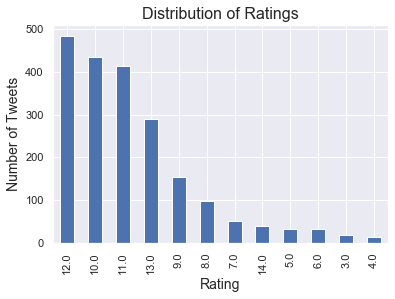

In [302]:
twitter_df['rating_numerator'].value_counts()[:4].plot(kind = 'bar')
#plt.figure(figsize=[10,8])
#n, bins, patches = plt.hist(x= twitter_df['rating_numerator'] , bins=8, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

    Rating 12 is said to be given mainly to most of tweets

In [275]:
# top 10 predicted dog breeds. 
twitter_df.dog_breed_prediction.value_counts()[0:10]

golden_retriever      137
Labrador_retriever    94 
Pembroke              88 
Chihuahua             78 
pug                   54 
chow                  41 
Samoyed               40 
Pomeranian            38 
toy_poodle            37 
malamute              29 
Name: dog_breed_prediction, dtype: int64

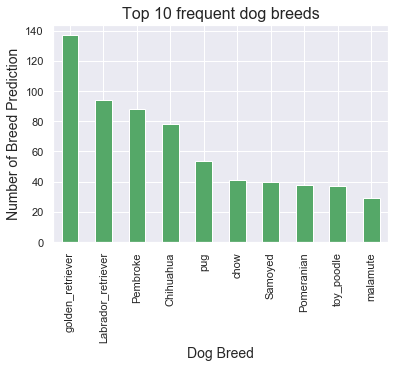

In [248]:
# ploting 
twitter_df.dog_breed_prediction.value_counts()[0:10].sort_values(ascending = False).plot(kind = 'bar', color = 'g') 
plt.ylabel('Number of Breed Prediction', fontsize = 14)
plt.title('Top 10 frequent dog breeds',fontsize = 16)
plt.xlabel('Dog Breed',fontsize = 14)
plt.plot();

    golden retrieved is said to be the most common tweeted breed

In [250]:
dog_fav = twitter_df.groupby('dog_breed_prediction')['favorite_count'].sum().sort_values(ascending = False)

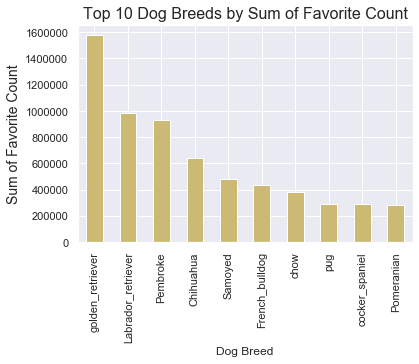

In [251]:
dog_fav.head(10).plot(kind = 'bar', color = 'y')
plt.ylabel('Sum of Favorite Count', fontsize = 14)
plt.xlabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Sum of Favorite Count', fontsize = 16)
plt.show();

    The plot above shows the top 10 dog breeds ranked by sum of favourite counts. 
    It looks very similar to the barplot ealier of top 10 frequent dog and in fact the top 4 dog breeds are the same. 



In [252]:
dog_fav.head(10)

dog_breed_prediction
golden_retriever      1578309.0
Labrador_retriever    986546.0 
Pembroke              930399.0 
Chihuahua             641854.0 
Samoyed               480124.0 
French_bulldog        437611.0 
chow                  379906.0 
pug                   292063.0 
cocker_spaniel        288521.0 
Pomeranian            284576.0 
Name: favorite_count, dtype: float64

In [253]:
twitter_df.retweet_count.describe()

count    2087.000000 
mean     2527.161955 
std      4423.054938 
min      11.000000   
25%      560.000000  
50%      1224.000000 
75%      2875.000000 
max      77877.000000
Name: retweet_count, dtype: float64

In [255]:
twitter_df.stage.value_counts()

pupper            220
doggo             72 
puppo             23 
floofer           9  
doggo, pupper     9  
doggo, puppo      1  
doggo, floofer    1  
Name: stage, dtype: int64

### Insights

- Most of the dogs score a rating of 12
- Most common dog that is tweeted about, with almost 137 tweets, is the Golden Retriever, as identified (predicted) by the neural network.
- Dogs with most number of favourite count is Golden Retriever. which is followed by Labrador_retriever ,Pembroke and Chihuahua
- Tweet with maximum number retweets have 77877 retweets, mean retweets are 2527. 
- Majority of tweets have the dogs stage as pupper.